# Model validation - Logo collage
 
As an important initial check, here we shall make a collage image from the 'template' logos used to train the classifier. We will then apply the classifier to the collage image to investigate if the logo-matching works in an 'ideal' setting. The collage here has been made from the training logos with the `make_collage.sh` script in `data/logos`, which uses imagemagick to generate the collage.

Firstly, we load the training image:

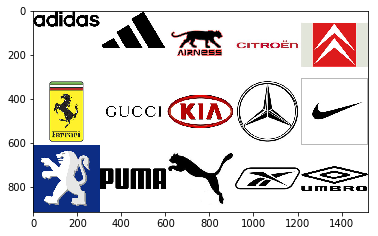

In [4]:
import lib.model as model
import cv2, os
from matplotlib import pyplot as plt

# Read the collage test image
collage_filename = "data/logos/collage.jpeg"
collage_image = cv2.imread(collage_filename)
plt.imshow(cv2.cvtColor(collage_image, cv2.COLOR_BGR2RGB))
plt.show()

Secondly, we build a model to classify the logos present within it:

In [2]:
# Initialise a list of car and clothing logo brands
all_logos  = ["Citroen", "Citroen-text", "Ferrari", "Kia", "Mercedes", "Peugeot",
              "Adidas", "Adidas-text", "Airness", "Gucci", "Nike", "Puma", "Puma-text", "Reebok", "Umbro"]

# Create the model
SIFT = cv2.xfeatures2d.SIFT_create()
SIFTMatcher = model.KeypointMatcher(SIFT, cv2.NORM_L2SQR)

for logo_name in all_logos:
    # Get the logo image and add it to the matcher
    logo_filename = os.path.join("data", "logos", logo_name.lower() + '.jpg')
    logo_image = cv2.imread(logo_filename)
    SIFTMatcher.add_template(logo_name, logo_image)

Finally let's try and classify the logos in our collage:

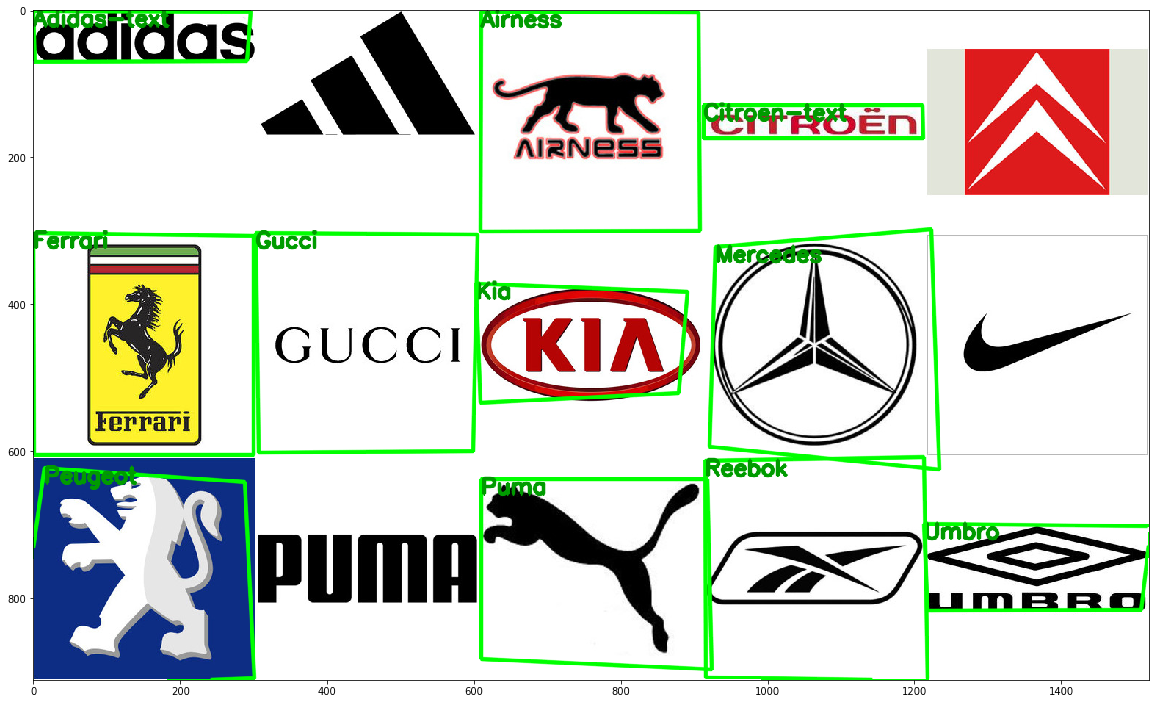

In [3]:
# Run the model over the image
detected_objects = SIFTMatcher.detect_objects(collage_image)
annotated_image = model.annotate_image_with_objects(collage_image, detected_objects, text_colour = (0,155,0))

# Plot the image
fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.show()

Interestingly, mixed results from this experiment. While most logos are correctly identified. The puma-text, adidas, nike and citroen logos
cannot be identified. These logos will have to be studied in detail to understand why.